<a href="https://colab.research.google.com/github/amaliaristantya/Hate_Speech_Classification/blob/main/Hate_speech_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Hate Speech (Indonesia)




Tujuan dari project ini adalah untuk membangun model yang memungkinkan kita mendeteksi perkataan yang mendorong ujaran kebencian/ hate speech. Dalam hal ini, sebuah tweet diklasifikasikan menjadi 2 target yaitu Non_HS (tidak mengandung hate speech) dan HS(mengandung hate speech)

* Source Dataset :https://github.com/ialfina/id-hatespeech-detection

* Source Code : https://github.com/GTOhhhhh/twitter_sentiment_analysis

## Section 1: Setup ##

Dataset yang digunakan yaitu terdiri dari 713 tweets berbahasa indonesia yang mempunyai label. Label tersebut terdiri dari 2 label yang telah di encode menjadi numeric. label Non_HS = 1 dan label HS = 0

In [1]:
import pandas as pd
import numpy as np
import nltk
from textblob import Word


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/amaliaristantya/Hate_Speech_Classification/main/dataset_Hatespeech_Indo.csv')

print(df.shape)
df.head()

(713, 2)


,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [10]:
#rename head of Dataset 
df.rename(index=str, columns={'Label': 'label',
                              'Tweet': 'tweet'}, inplace=True)
df.head()

,label,tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [11]:
# Replace Churn Values
df['label'].replace(['Non_HS','HS'],[0,1],inplace=True)

# Show Data
df

,label,tweet
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,1,"Betul bang hancurkan merka bang, musnahkan chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [12]:
df.shape

(713, 2)

Tahap Preprocessing : 

- transform all tweet text to be lower case
- remove punctuation
- clean white space
- remove urls
- lemmatization

In [13]:
# transform to lower case
df.tweet = df.tweet.apply(lambda x: " ".join(x.lower() for x in x.split()))
df.tweet.head()

# remove punctuation
df.tweet = df.tweet.str.replace('[^\w\s]','')

# remove urls
df.tweet = df.tweet.str.replace(r'http[\w:/\.]+','') 

df.tweet = df.tweet.str.replace(r'\.\.+','.') #replace multple periods with a single one
df.tweet = df.tweet.str.replace(r'\.',' .')   #replace multple periods with a single one
df.tweet = df.tweet.str.replace(r'\s\s+',' ') #replace multple white space with a single one


# lemmatization
import nltk
nltk.download('wordnet')
df.tweet = df.tweet.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.tweet = df.tweet.str.strip() 
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,label,tweet
0,0,rt spardaxyz fadli zon minta mendagri segera m...
1,0,rt baguscondromowo mereka terus melukai aksi d...
2,0,sylvi bagaimana gurbernur melakukan kekerasan ...
3,0,ahmad dhani tak puas debat pilkada masalah jal...
4,0,rt lisdaulay28 waspada ktp palsukawal pilkada


Untuk mengukur model klasifikasi, maka digunakan  matrik sebagai berikut :

**True Positives (TP)** - Ini adalah nilai positif yang diprediksi dengan benar yang berarti nilai kelas sebenarnya adalah HS dan nilai kelas yang diprediksi juga adalah HS.

**True Negatives (TN)** -  Ini adalah nilai negatif yang diprediksi dengan benar yang berarti nilai kelas sebenarnya adalah Non_HS dan nilai kelas yang diprediksi juga Non_HS.

**False Positives (FP)** – Ketika kelas sebenarnya adalah Non_HS dan kelas yang diprediksi adalah HS.

**False Negatives (FN)** – Jika kelas sebenarnya adalah HS, tetapi kelas yang diprediksi dalam Non_HS.

**Precision** = TP/TP+FP

**Recall** = TP/TP+FN

**F1 Score** = 2*(Recall * Precision) / (Recall + Precision)
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png) 

https://en.wikipedia.org/wiki/F1_score


## Section 2: Approach ##
Pada Tahap 1 project analisis sentimen kami, kami membangun model sederhana dengan menghitung frekuensi setiap kata yang muncul di setiap tweet. Ini dikenal sebagai metode 'bag-of-words' (BoW) di dalam Natural Language rocessing (NLP). Kita dapat menganggap bag-of-words mewakili setiap tweet sebagai multiset, atau sebagai alternatif sebagai vektor. Meskipun fitur ini relatif sederhana untuk diekstrak, untuk tahap 2 kami akan menggunakan pendekatan yang lebih canggih menggunakan jenis Recurring Neural Net (RNN) tertentu yang dikenal sebagai Long Short Term Memory network (LSTM).

Dibandingkan dengan pendekatan 'bag-of-words', model LSTM dapat mempertimbangkan struktur kalimat. Jika metode BoW hanya mempertimbangkan berapa kali kata tertentu muncul dalam tweet, model LSTM dapat memperhitungkan urutan kata melalui penggunaan chain seperti struktur cell states

<br><br>
![The repeating module in an LSTM contains four interacting layers.](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)
<br>
<center><b> The repeating module of a simple unrolled LSTM containing four interacting layers.</b></center>
<br>

Ketika jaringan menemukan informasi baru, lapisan-lapisan ini memutuskan berapa banyak informasi yang dibawa ke depan atau dibiarkan, dan berapa banyak yang ditambahkan. Setiap sel LSTM mengambil vektor masukan dan vektor keluaran tersembunyi dari sel sebelumnya dan menghasilkan vektor keluaran dan vektor keluaran tersembunyi untuk sel berikutnya 

#### Using multiple models for binary classification
Kami akan melakukan tolok ukur model LSTM ini terhadap model yang menggunakan Multinomial Naive Bayes Dengan Vektor Tf-Idf, serta model Support Vector Machine (SVM) dengan bobot kelas yang seimbang.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import re

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, LSTM, Embedding, Reshape
from keras.models import load_model, model_from_json

from sklearn.model_selection import train_test_split

import os
import urllib

from collections import Counter

https://stackoverflow.com/questions/43034960/many-to-one-and-many-to-many-lstm-examples-in-keras

In [15]:
df.tweet.values[0]

'rt spardaxyz fadli zon minta mendagri segera menonaktifkan ahok jadi gubernur dki'

Kami mendapatkan semua kata unik dari setiap tweet. Kami hanya akan mempertimbangkan kata-kata yang digunakan lebih dari 4 kali.

In [16]:
all_text = ' '.join(df.tweet.values)
words = all_text.split()
u_words = Counter(words).most_common()
# we will only consider words that have been used more than 4 times
u_words = [word[0] for word in u_words if word[1]>4] 
# create the dictionary
word2num = dict(zip(u_words,range(len(u_words))))
word2num['<Other>'] = len(u_words)
num2word = dict(zip(word2num.values(), word2num.keys()))

int_text = [[word2num[word] if word in word2num else len(u_words) for word in Review.split()] for Review in df.tweet.values]

print('The number of unique words are: ', len(u_words))
print('The first tweet looks like this: ')
print(int_text[0][:20])

The number of unique words are:  348
The first tweet looks like this: 
[5, 348, 348, 348, 283, 348, 348, 348, 0, 21, 44, 16]


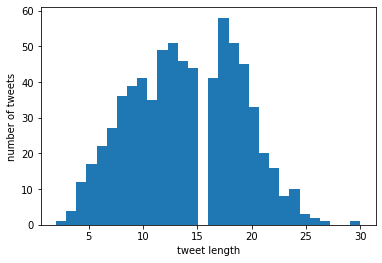

In [17]:
plt.hist([len(t) for t in int_text],30)
plt.xlabel('tweet length')
plt.ylabel('number of tweets')
plt.show()

In [18]:
print('The number of tweets greater than 25 in length is: ', np.sum(np.array([len(t)>25 for t in int_text])))

The number of tweets greater than 25 in length is:  4


In [19]:
num2word[len(word2num)] = '<PAD>'
word2num['<PAD>'] = len(word2num)

for i, t in enumerate(int_text):
    if len(t)<25:
        int_text[i] = [word2num['<PAD>']]*(25-len(t)) + t
    elif len(t)>25:
        int_text[i] = t[:25]
    else:
        continue

x = np.array(int_text)
y = df.label.values

# split data for train/test crossover
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#### Many To One LSTM
untuk model ini kita akan menggunakan LSTM many to one. Kami akan menggunakan fungsi binary cross entropy loss dan algoritma adam optimization untuk deep learning yang diturunkan dari estimasi momen adaptif.

In [20]:
model = Sequential()
model.add(Embedding(len(word2num), 32)) # , batch_size=batch_size
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          11200     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 36,097
Trainable params: 36,097
Non-trainable params: 0
_________________________________________________________________


In [21]:
X_train.shape

(641, 25)

In [22]:
batch_size = 128
model.fit(X_train, y_train, batch_size=batch_size, epochs=2, verbose=1)

Epoch 1/2
6/6 [==============================] - 0s 25ms/step - loss: 0.6888 - accuracy: 0.5741
Epoch 2/2
6/6 [==============================] - 0s 26ms/step - loss: 0.6721 - accuracy: 0.6318


Nilai pertama di bawah ini adalah loss rate, sedangkan nilai kedua adalah metrik akurasi yang dihitung dengan keras..

In [23]:
model.evaluate(X_test, y_test, batch_size=batch_size) # loss value & accuracy

1/1 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6667


[0.6500728130340576, 0.6666666865348816]

nilai akurasi pada test tergolong rendah yaitu 0.6320.Mari kita hitung skor F1 selama test split dengan sci-kit.

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.round(model.predict(X_test))))
y_test.shape

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        48
           1       0.00      0.00      0.00        24

    accuracy                           0.67        72
   macro avg       0.33      0.50      0.40        72
weighted avg       0.44      0.67      0.53        72



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(72,)

Prediksi untuk satu tweet terlihat seperti ini

In [25]:
X_test[0,:]

array([349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349,   5,
       348, 348,  64,  16, 312, 348, 348, 348, 348, 348, 348,   6])

In [26]:
model.predict(X_test[0][None,:])

array([[0.4149611]], dtype=float32)

In [27]:
y_test[0]

0

Mari kita coba membuat model lain untuk perbandingan.

#### Multinomial Naive Bayes With Tf-Idf Vectors & SVM with balanced class weights


In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(df.tweet, df.label, test_size=0.33,
                                                    random_state=5)

# Pipeline for multinomial naive Bayes
mnb = Pipeline([('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())
               ])


# Pipeline for polynomial support vector machine with balanced class weights
svm = Pipeline([('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(C=0.1, penalty='l2', class_weight='balanced'))
               ])

# Grid search parameters
param_grid = [{'vect__binary': [True],
               'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': [True, False]
              },
              {'vect__binary': [False],
               'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': [True, False]
              }
             ]

# Find best parameters for MNB
gs_mnb = GridSearchCV(mnb, param_grid)
gs_mnb.fit(X_train, y_train)
print('\nMNB best params:\n', gs_mnb.best_params_)

# Find best parameters for SVM
gs_svm = GridSearchCV(svm, param_grid)
gs_svm.fit(X_train, y_train)
print('\nSVM best params:\n', gs_svm.best_params_)

# Print accuracy
print('\nMNB test result:\n', classification_report(y_test, gs_mnb.predict(X_test)))
print('\nSVM test result:\n', classification_report(y_test, gs_svm.predict(X_test)))


MNB best params:
 {'tfidf__use_idf': True, 'vect__binary': True, 'vect__ngram_range': (1, 1)}

SVM best params:
 {'tfidf__use_idf': True, 'vect__binary': False, 'vect__ngram_range': (1, 1)}

MNB test result:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       144
           1       1.00      0.35      0.52        92

    accuracy                           0.75       236
   macro avg       0.85      0.67      0.67       236
weighted avg       0.82      0.75      0.71       236


SVM test result:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       144
           1       0.85      0.76      0.80        92

    accuracy                           0.86       236
   macro avg       0.86      0.84      0.85       236
weighted avg       0.86      0.86      0.85       236



In [29]:
from sklearn import metrics
print('MNB Accuracy: ', metrics.accuracy_score(y_test, gs_mnb.predict(X_test)))
print('SVM Accuracy: ', metrics.accuracy_score(y_test, gs_svm.predict(X_test)))      

MNB Accuracy:  0.7457627118644068
SVM Accuracy:  0.8559322033898306


## Section 3: Comparing Results

In [30]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Classification report for MNB

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       144
           1       1.00      0.35      0.52        92

    accuracy                           0.75       236
   macro avg       0.85      0.67      0.67       236
weighted avg       0.82      0.75      0.71       236



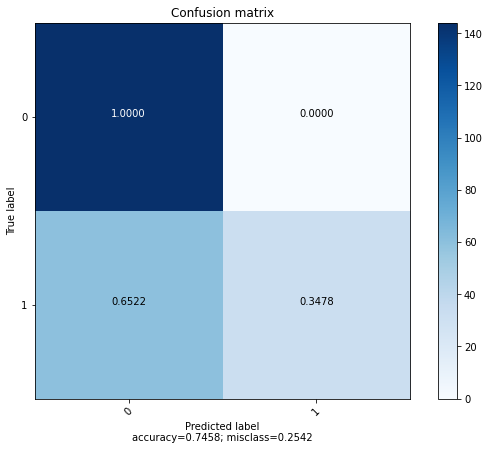

Matthews correlation coefficient (MCC):  0.4955040834092003


In [31]:
pred = gs_mnb.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
mt = metrics.matthews_corrcoef(y_test, pred)
print('Classification report for MNB\n')
print(classification_report(y_test, pred))

plot_confusion_matrix(cm, [0,1])
print('Matthews correlation coefficient (MCC): ', mt)

Classification report for SVM

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       144
           1       0.85      0.76      0.80        92

    accuracy                           0.86       236
   macro avg       0.86      0.84      0.85       236
weighted avg       0.86      0.86      0.85       236



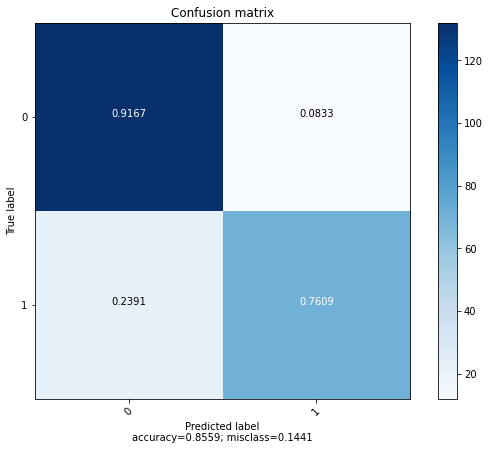

Matthews correlation coefficient (MCC):  0.6939695223311734


In [32]:
pred = gs_svm.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
mt = metrics.matthews_corrcoef(y_test, pred)
print('Classification report for SVM\n')
print(classification_report(y_test, pred))

plot_confusion_matrix(cm, [0,1])
print('Matthews correlation coefficient (MCC): ', mt)                              

## Section 4: Conclusion

Dengan membandingkan skor F1 & MCC (urutan yang sama) kami melihat bahwa model SVM lebih baik jika dibandingkan dengan MNB

Dari clasification report dan confusion matrix kita dapat melihat bahwa presisi untuk tweet yang tidak mengandung hate speech (Non_HS)  (TP / (TP + FP)) adalah tinggi yaitu 0.86
